# Initialize

In [1]:
%cd ".."

/local_data/teo_fs_fast/rtorre/cernbox/ML/TwoSampleTests/GitHub/JetNetMetrics


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-09-12 14:50:20.198295: Importing os...
2024-09-12 14:50:20.198429: Importing sys...
Visible devices: [0]
2024-09-12 14:50:20.198561: Importing timer from timeit...
2024-09-12 14:50:20.198597: Setting env variables for tf import (only device(s) [0] will be available)...
2024-09-12 14:50:20.198666: Importing numpy...
2024-09-12 14:50:20.280135: Importing matplotlib...
2024-09-12 14:50:20.447625: Importing h5py...
2024-09-12 14:50:20.459501: Importing importlib.util...
2024-09-12 14:50:20.459568: Importing json...
2024-09-12 14:50:20.459605: Importing pandas...
2024-09-12 14:50:20.639547: Importing random...
2024-09-12 14:50:20.639629: Importing scipy utils...
2024-09-12 14:50:20.829425: Importing subprocess...
2024-09-12 14:50:20.829564: Importing textwrap...
2024-09-12 14:50:20.829598: Importing tensorflow...
Tensorflow version: 2.12.0
2024-09-12 14:50:21.994359: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-09-12 14:50:22.124303: Importing timeit.

# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


# Jet level

## Init data

In [6]:
results_dir = "results/jet_features/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories waere created")

In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_jet_features(jet_features):
    p_T_jet = jet_features[:,1]
    eta_jet = jet_features[:,2]
    m_jet = jet_features[:,3]
    m_jet_over_p_T_jet = m_jet / p_T_jet
    return tf.stack([p_T_jet, eta_jet, m_jet, m_jet_over_p_T_jet], axis=1)

jet_features_reduced = get_reduced_jet_features(jet_features)
jet_features_reduced.shape

TensorShape([177252, 4])

## Plots

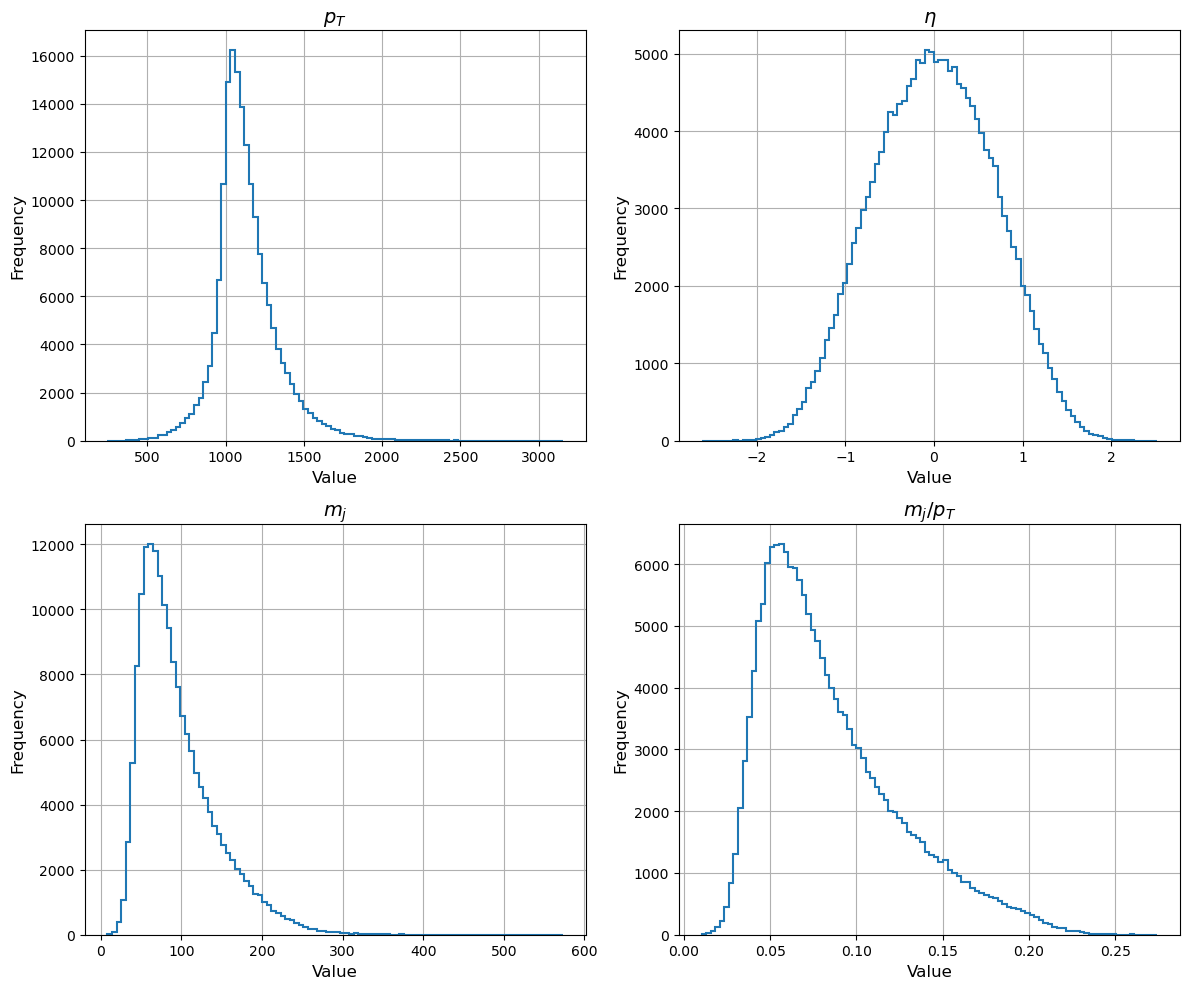

In [8]:
names = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(jet_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(jet_features_reduced.numpy()[:, i], bins=100, histtype='step', linewidth=1.5)
    axs[i].set_title(name, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
mean = tf.reduce_mean(jet_features_reduced, axis=0)
std = tf.math.reduce_std(jet_features_reduced, axis=0)

eps_mu = 0.5
eps_sigma = 0.5
eps_sigma_off_diag = 0.5
eps_power_plus = 0.5
eps_power_minus = 0.5
eps_shift_normal = 0.5
eps_shift_uniform = 0.5

preprocessed_jet_features_reduced = preprocess_data(jet_features_reduced, mean, std)
deformed1 = deform_mean(preprocessed_jet_features_reduced,
                        eps = eps_mu,
                        seed = 0)
deformed2 = deform_cov_diag(preprocessed_jet_features_reduced,
                            eps = eps_sigma,
                            seed = 0)
deformed3 = deform_cov_off_diag(preprocessed_jet_features_reduced,
                                eps = eps_sigma_off_diag,
                                seed = 0)
deformed4 = deform_power_abs(preprocessed_jet_features_reduced,
                             eps = eps_power_plus,
                             direction = "up")
deformed5 = deform_power_abs(preprocessed_jet_features_reduced,
                             eps = eps_power_minus,
                             direction = "down")
deformed6 = deform_random(preprocessed_jet_features_reduced,
                          eps = eps_shift_normal,
                          shift_dist = "normal",
                          seed = 0)
deformed7 = deform_random(preprocessed_jet_features_reduced,
                          eps = eps_shift_uniform,
                          shift_dist = "uniform",
                          seed = 0)
jet_features_deform1_reduced = postprocess_data(deformed1, mean, std)
jet_features_deform2_reduced = postprocess_data(deformed2, mean, std)
jet_features_deform3_reduced = postprocess_data(deformed3, mean, std)
jet_features_deform4_reduced = postprocess_data(deformed4, mean, std)
jet_features_deform5_reduced = postprocess_data(deformed5, mean, std)
jet_features_deform6_reduced = postprocess_data(deformed6, mean, std)
jet_features_deform7_reduced = postprocess_data(deformed7, mean, std)

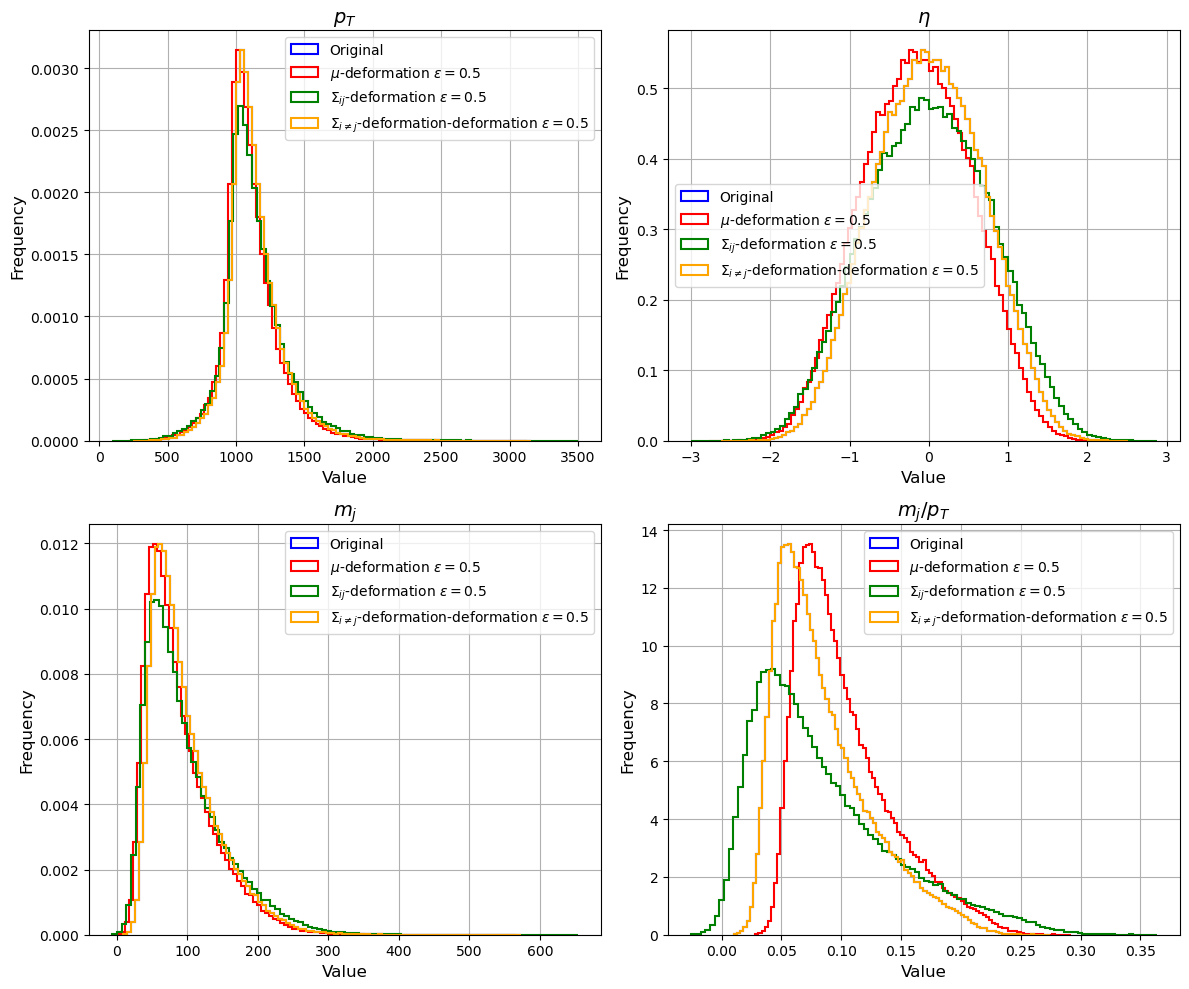

In [10]:
names = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(jet_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(jet_features_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='blue', label='Original')
    axs[i].hist(jet_features_deform1_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='red', label='$\mu$-deformation $\epsilon='+str(eps_mu)+'$')
    axs[i].hist(jet_features_deform2_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='green', label='$\Sigma_{ij}$-deformation $\epsilon='+str(eps_sigma)+'$')
    axs[i].hist(jet_features_deform3_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\Sigma_{i\\neq j}$-deformation-deformation $\epsilon='+str(eps_sigma_off_diag)+'$')
    axs[i].set_title(name, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(figures_dir + "deformed_jet_features_1.png")

# Show the plot
plt.show()

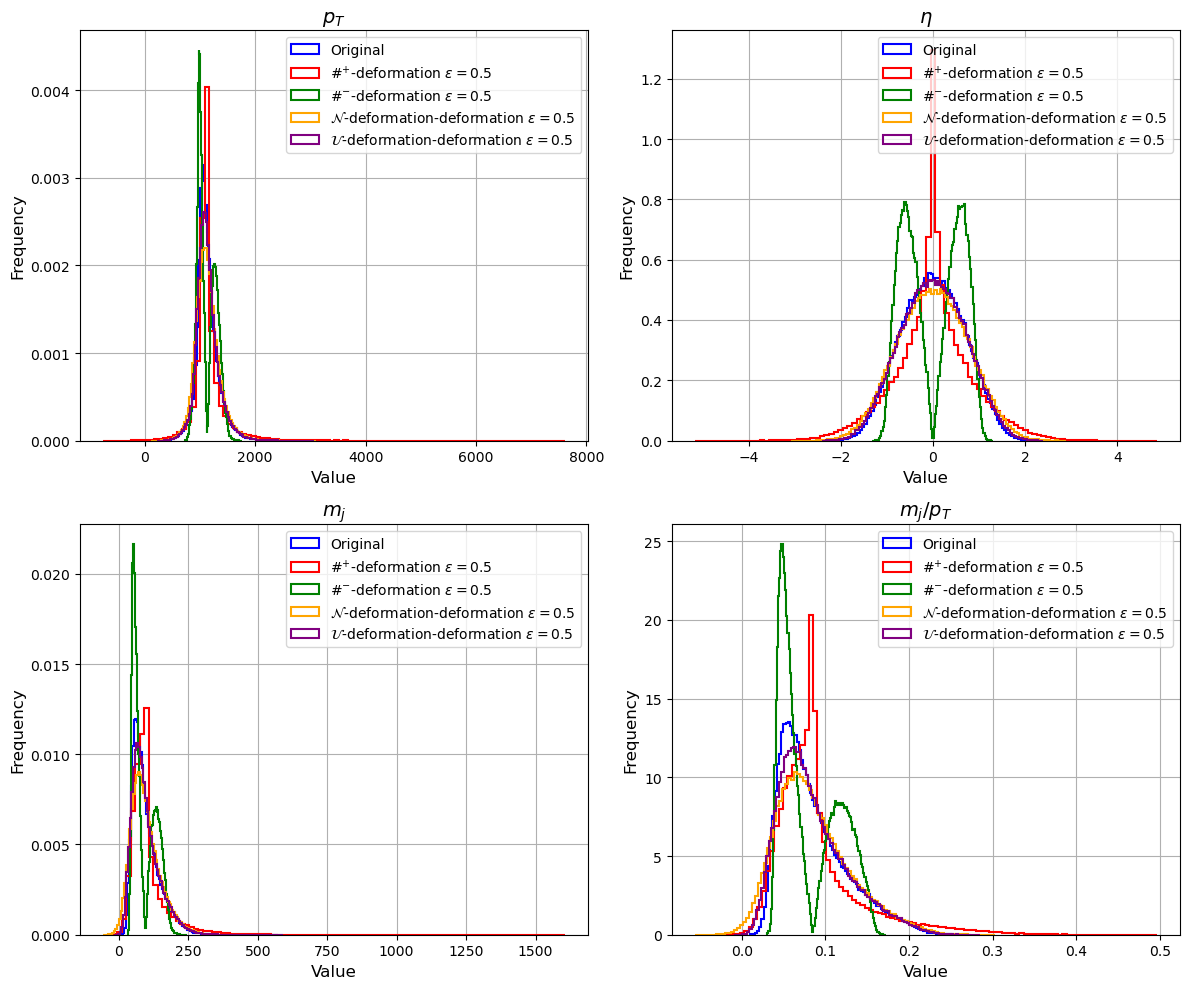

In [15]:
names = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(jet_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(jet_features_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='blue', label='Original')
    axs[i].hist(jet_features_deform4_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='red', label='$\#^{+}$-deformation $\epsilon='+str(eps_power_plus)+'$')
    axs[i].hist(jet_features_deform5_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='green', label='$\#^{-}$-deformation $\epsilon='+str(eps_power_minus)+'$')
    axs[i].hist(jet_features_deform6_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\mathcal{N}$-deformation-deformation $\epsilon='+str(eps_shift_normal)+'$')
    axs[i].hist(jet_features_deform7_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='purple', label='$\mathcal{U}$-deformation-deformation $\epsilon='+str(eps_shift_uniform)+'$')
    axs[i].set_title(name, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(figures_dir + "deformed_jet_features_2.png")

# Show the plot
plt.show()

Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.38321256591007113 s.
Computing HPD quotas...
HPD quotas computed in 0.31974864401854575 s.
Plotting corner plot...


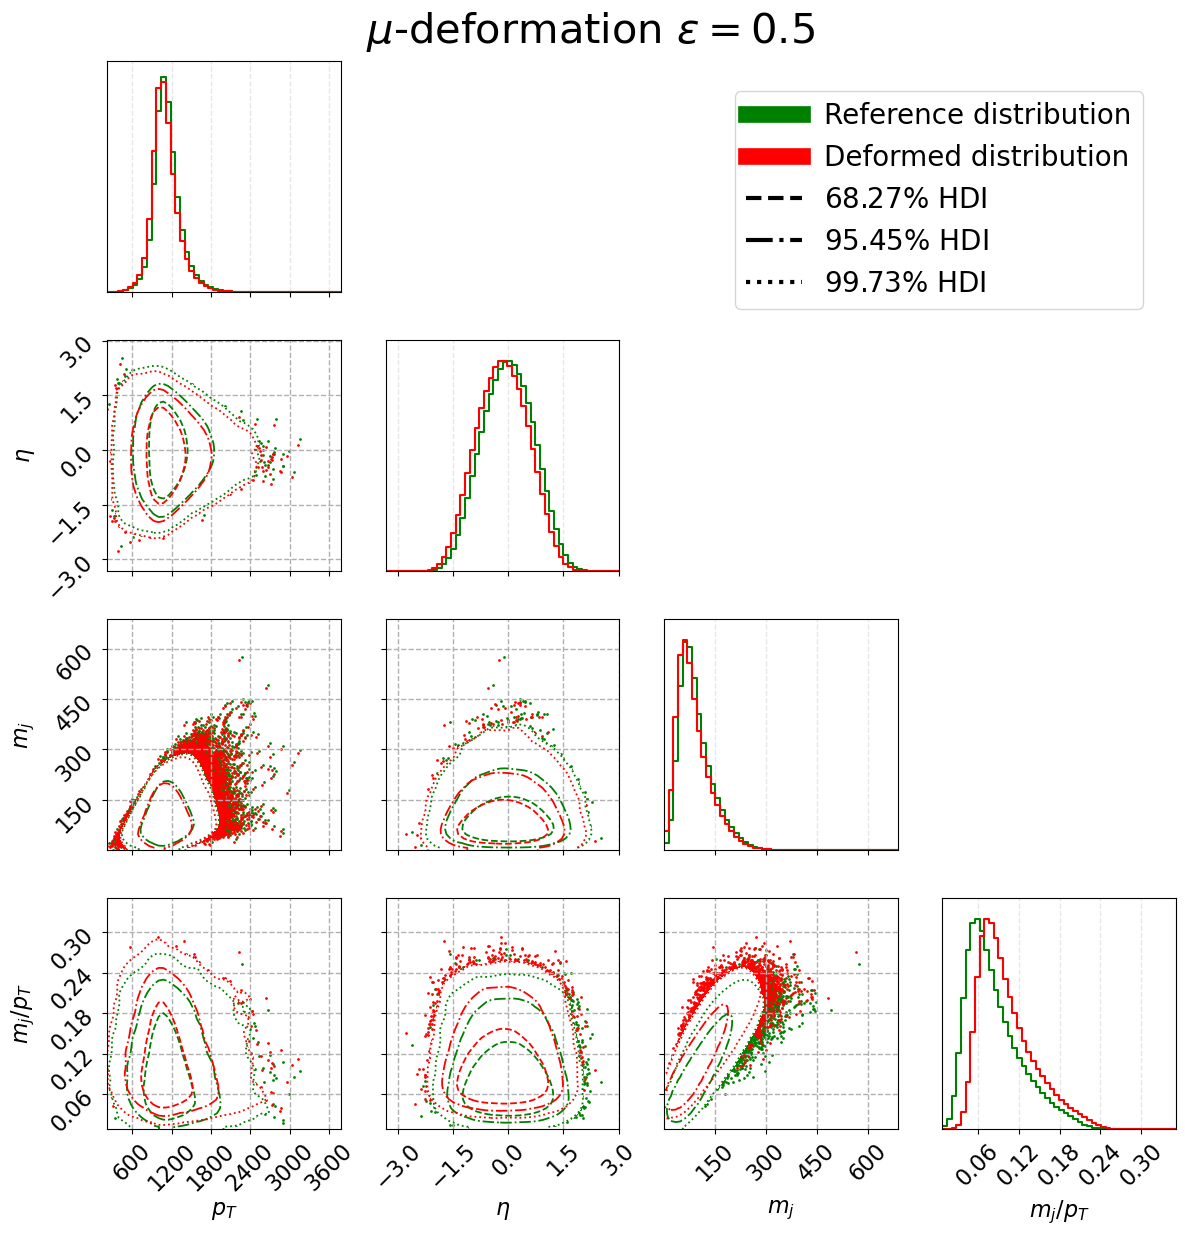

Plot done and saved in 2.3631642782129347 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.38852731813676655 s.
Computing HPD quotas...
HPD quotas computed in 0.32135515194386244 s.
Plotting corner plot...


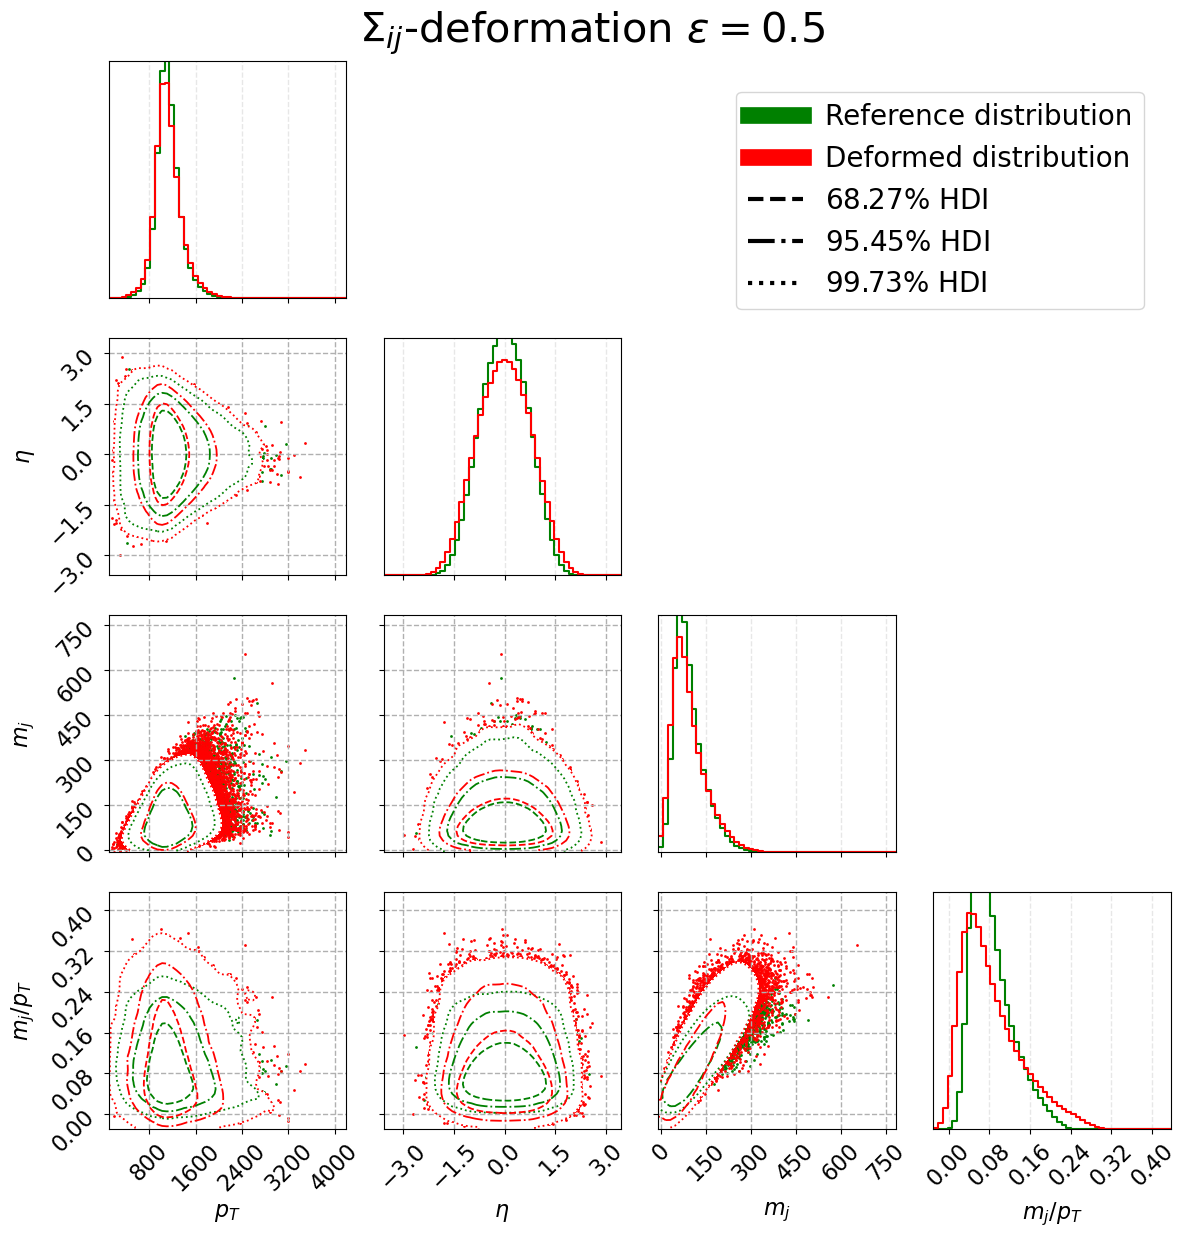

Plot done and saved in 2.4119541570544243 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.3854656049516052 s.
Computing HPD quotas...
HPD quotas computed in 0.31977833388373256 s.
Plotting corner plot...


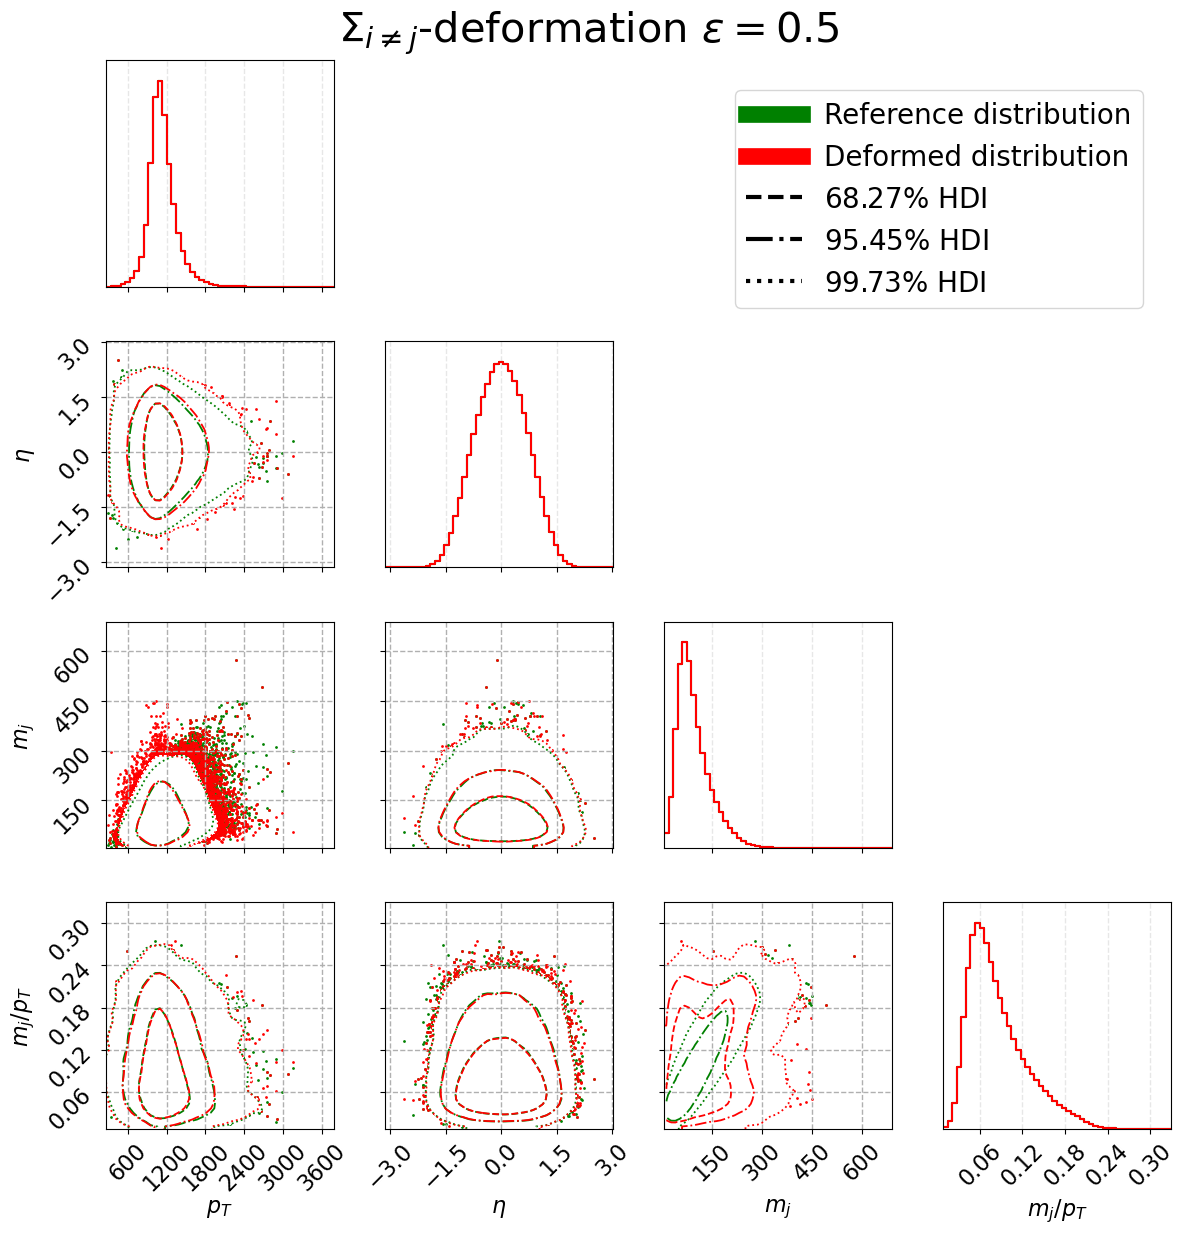

Plot done and saved in 2.3602525680325925 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.35995743214152753 s.
Computing HPD quotas...
HPD quotas computed in 0.29484676104038954 s.
Plotting corner plot...


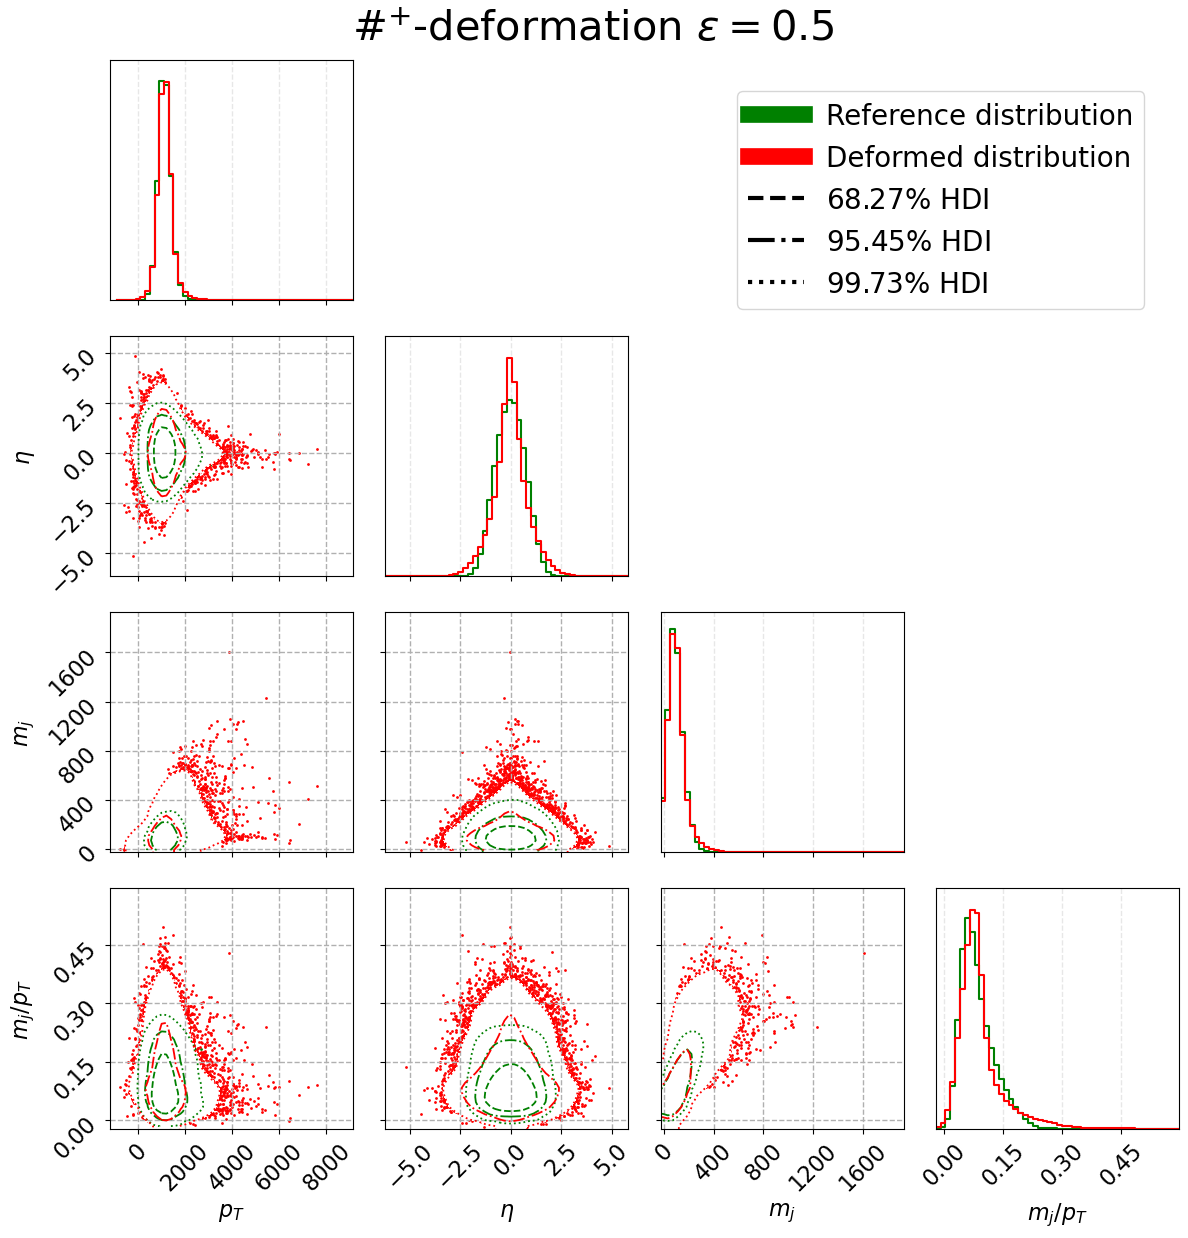

Plot done and saved in 2.5486203799955547 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.22201680694706738 s.
Computing HPD quotas...
HPD quotas computed in 0.34194359998218715 s.
Plotting corner plot...


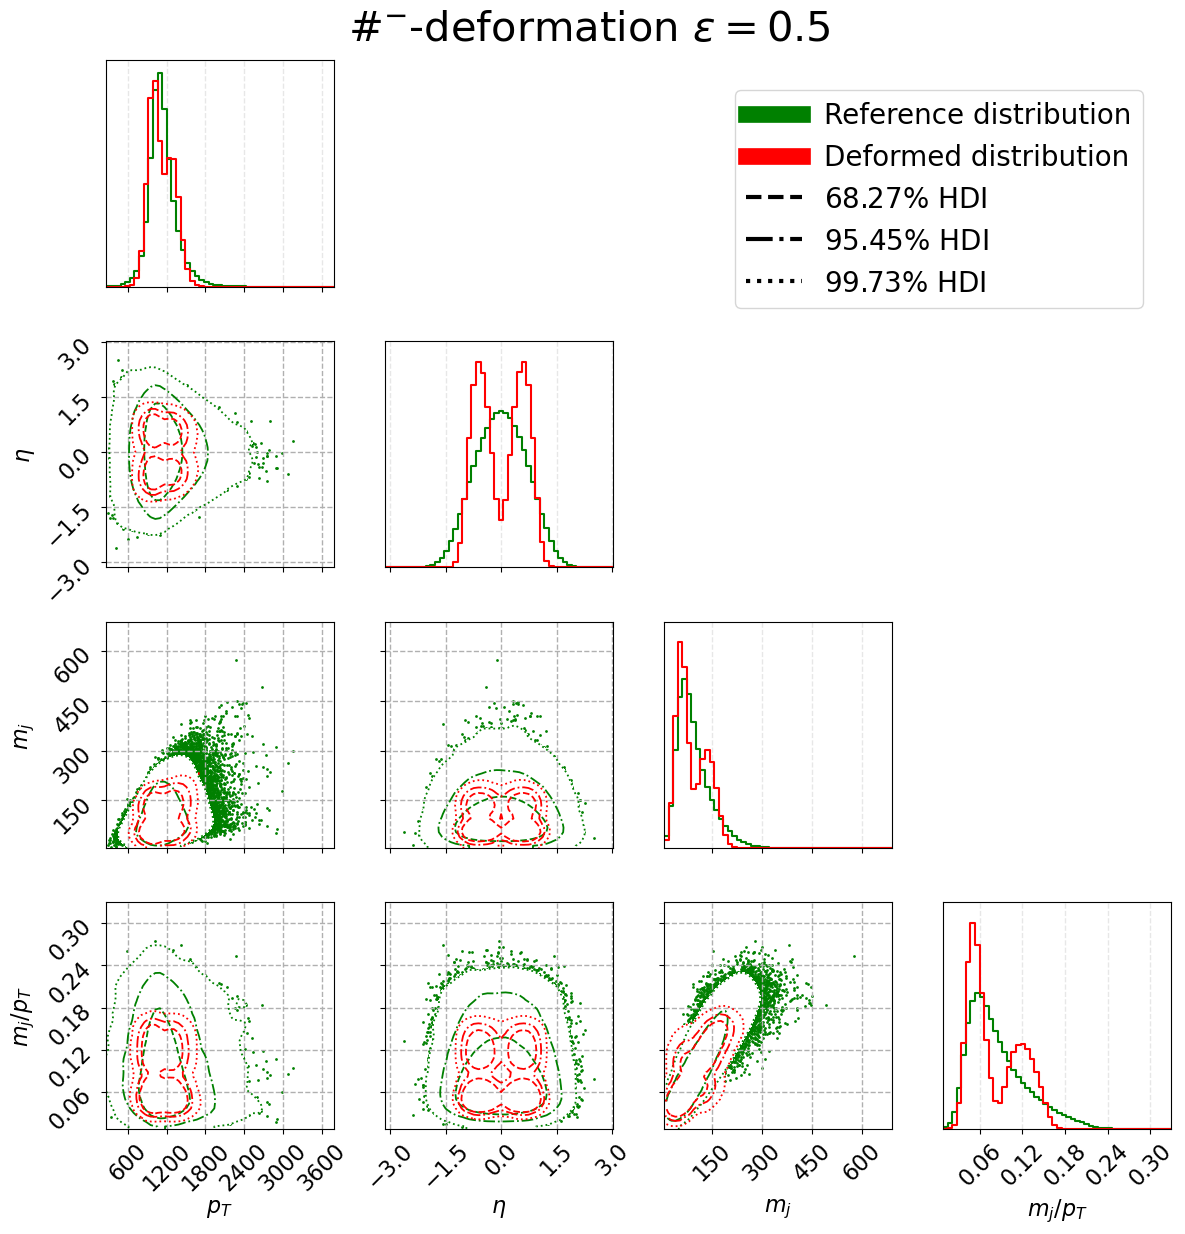

Plot done and saved in 2.2202526370529085 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.3663121231365949 s.
Computing HPD quotas...
HPD quotas computed in 0.32111385790631175 s.
Plotting corner plot...


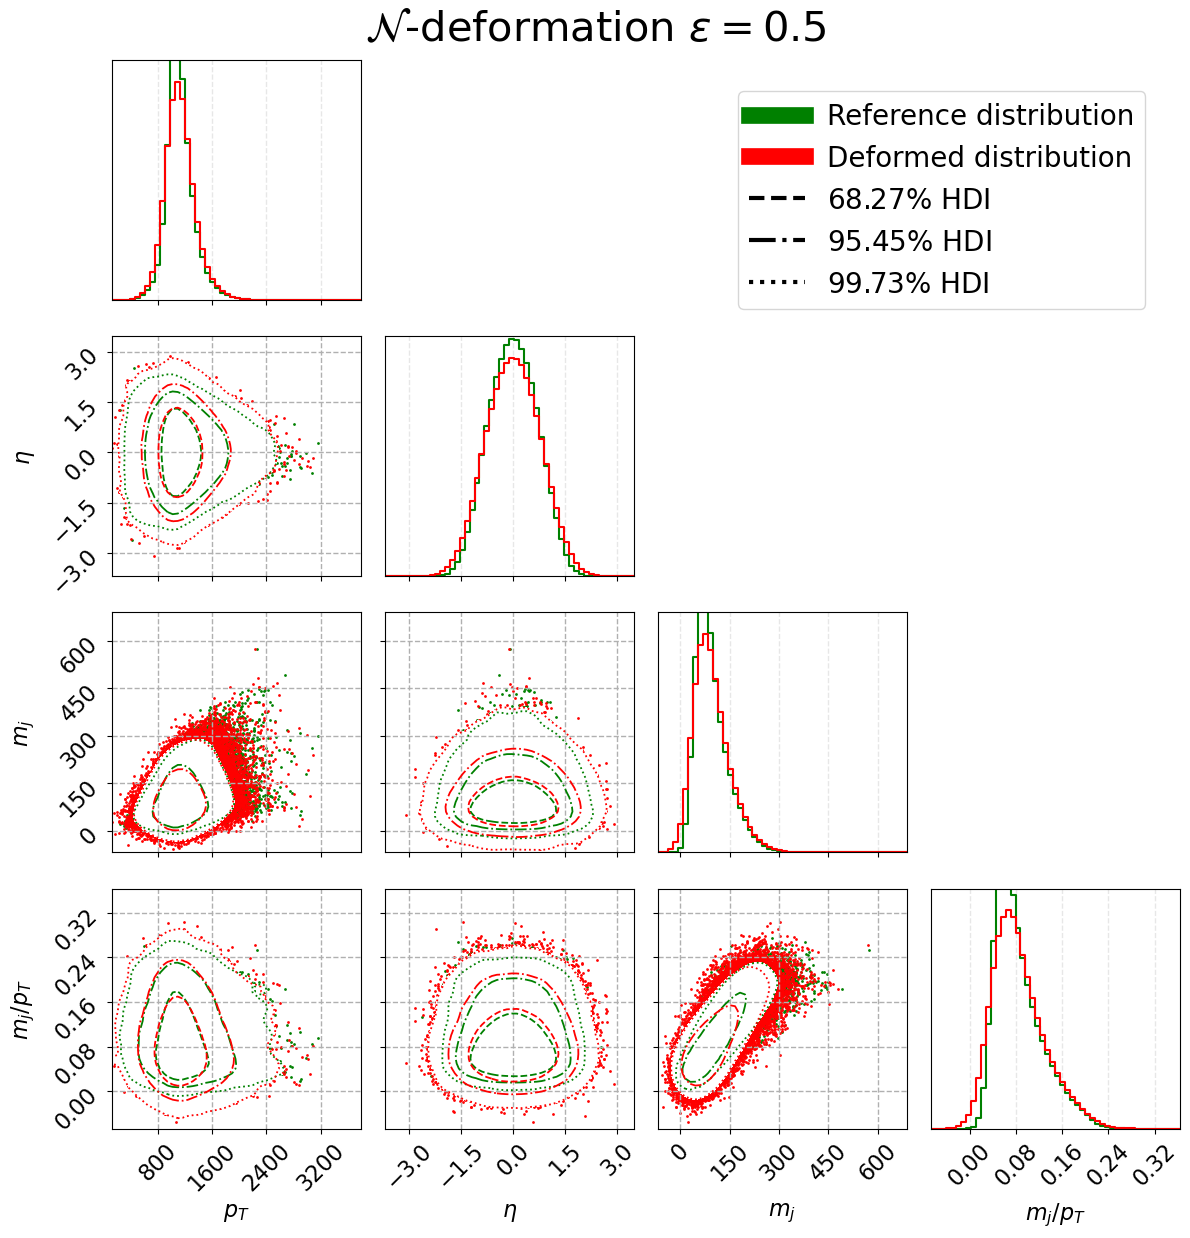

Plot done and saved in 2.388926486019045 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.3898989330045879 s.
Computing HPD quotas...
HPD quotas computed in 0.32145481393672526 s.
Plotting corner plot...


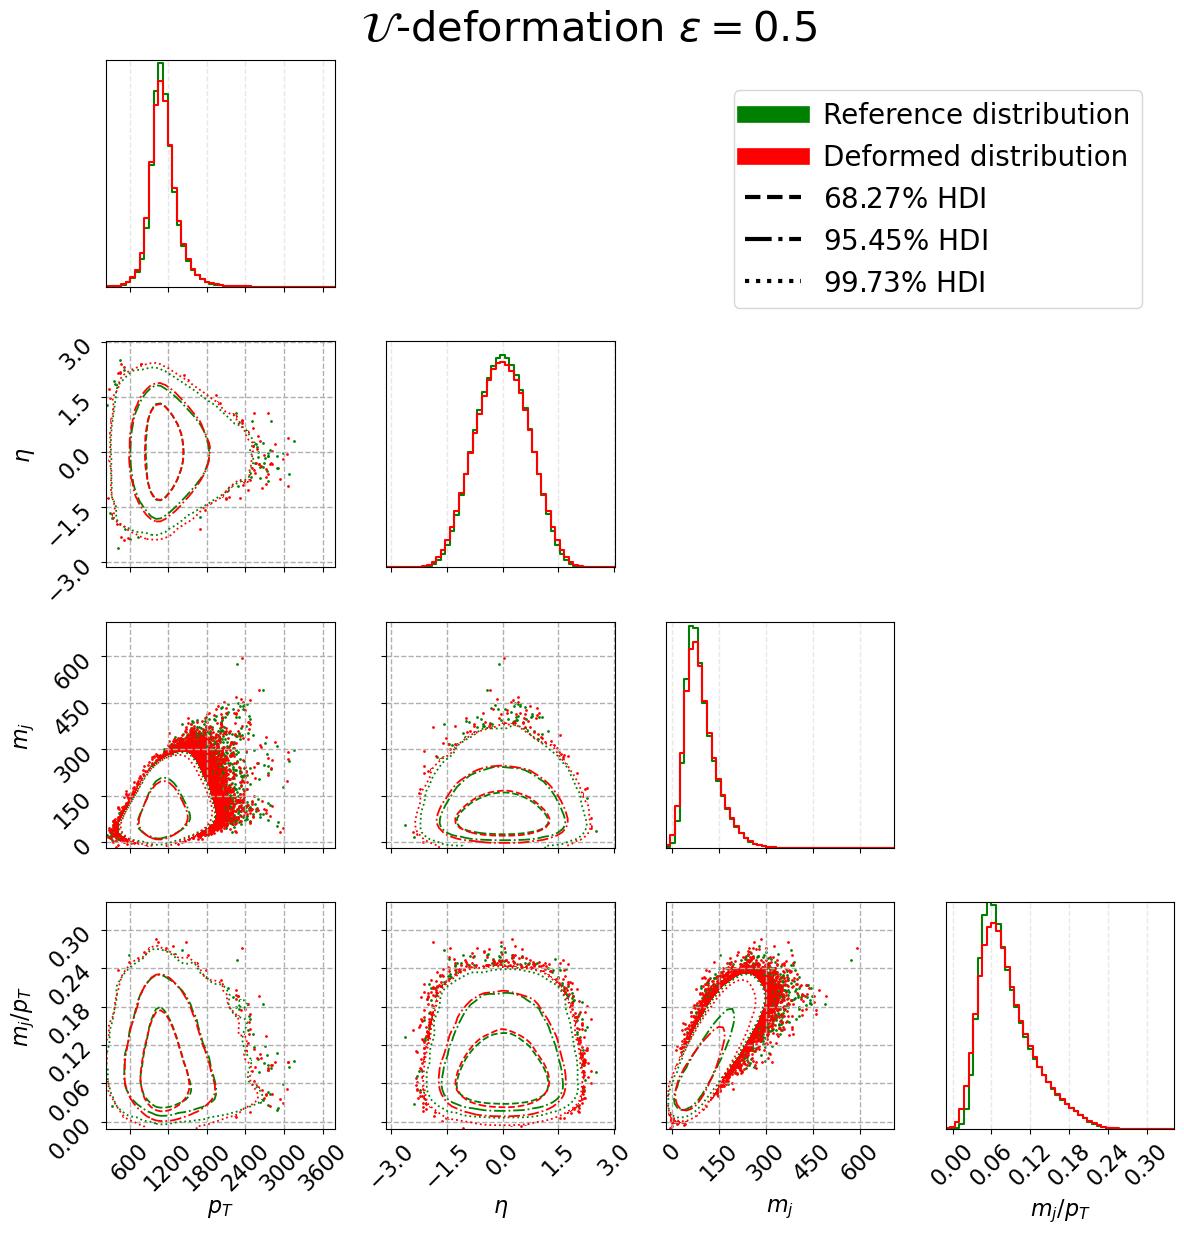

Plot done and saved in 2.390158607857302 s.


In [12]:
ds = [jet_features_deform1_reduced.numpy(),
      jet_features_deform2_reduced.numpy(),
      jet_features_deform3_reduced.numpy(),
      jet_features_deform4_reduced.numpy(),
      jet_features_deform5_reduced.numpy(),
      jet_features_deform6_reduced.numpy(),
      jet_features_deform7_reduced.numpy()]

plot_titles = [r"$\mu$-deformation $\epsilon="+str(eps_mu)+"$",
               r"$\Sigma_{ij}$-deformation $\epsilon="+str(eps_sigma)+"$",
               r"$\Sigma_{i\neq j}$-deformation $\epsilon="+str(eps_sigma_off_diag)+"$",
               r"$\#^{+}$-deformation $\epsilon="+str(eps_power_plus)+"$",
               r"$\#^{-}$-deformation $\epsilon="+str(eps_power_minus)+"$",
               r"$\mathcal{N}$-deformation $\epsilon="+str(eps_shift_normal)+"$",
               r"$\mathcal{U}$-deformation $\epsilon="+str(eps_shift_uniform)+"$"]

for i in range(len(ds)):
    plot_corners(jet_features_reduced.numpy(),
                 ds[i],
                 max_points = 1_000_000,
                 max_dim = 32,
                 n_bins = 50,
                 w1 = None,
                 w2 = None,
                 sigma_contours = [1,2,3],
                 show_intervals_1d = False,
                 extend_range_percent = 20,
                 title1 = None,
                 title2 = None,
                 color1 = "green",
                 color2 = "red",
                 plot_title = plot_titles[i],
                 title_kwargs = {"fontsize": 30, "y": 1.03},
                 labels = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"],
                 legend_labels = [r"Reference distribution",
                                  r"Deformed distribution",
                                  r'$68.27\%$ HDI',
                                  r'$95.45\%$ HDI',
                                  r'$99.73\%$ HDI'],
                 legend_kwargs = {"fontsize": 20, "loc": (0.62,0.75)},
                 figdir = figures_dir,
                 figname = "corner_plot_def_"+str(i+1)+".png",
                 save = True,
                 show = True)

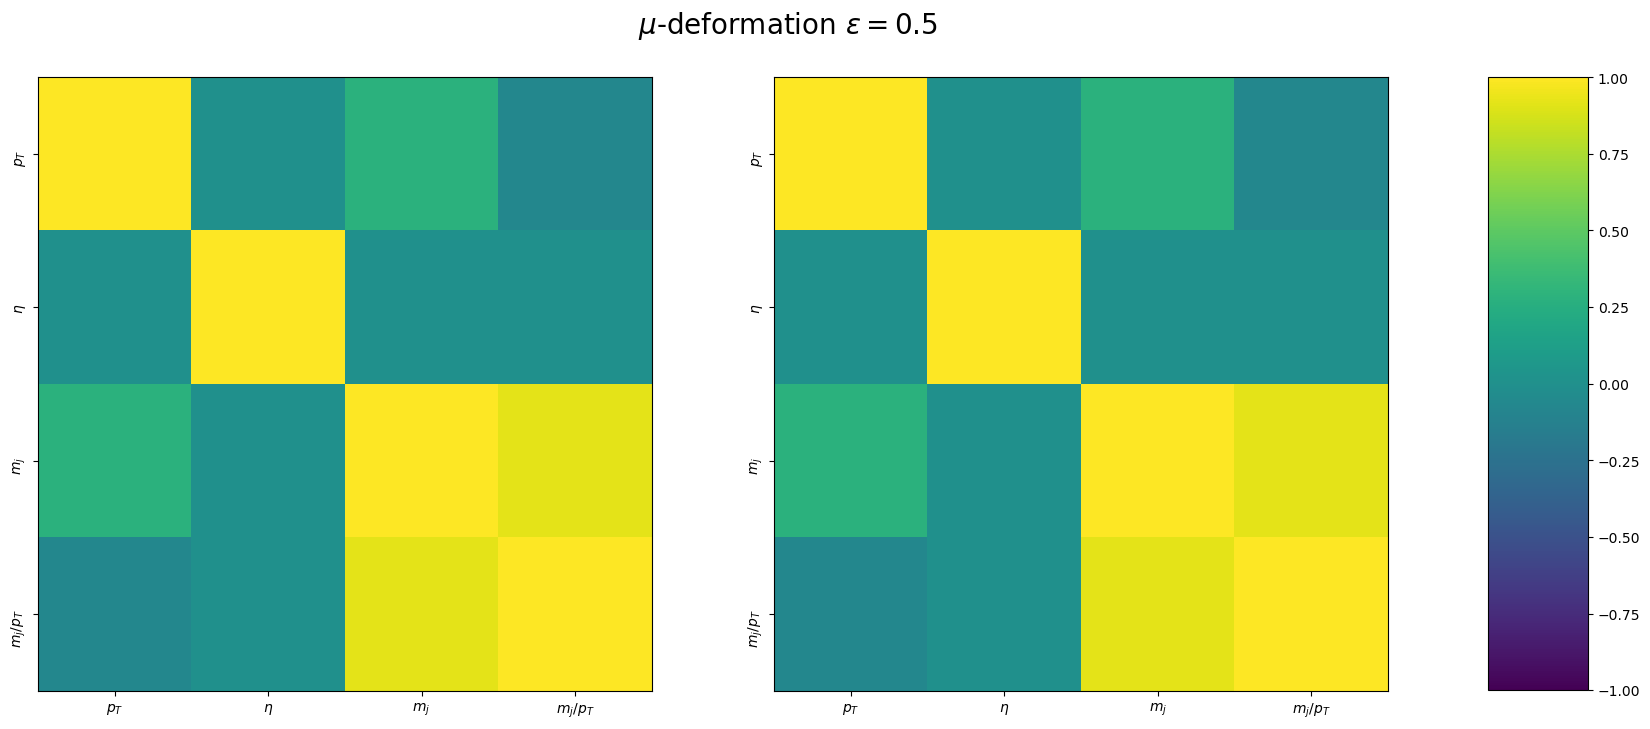

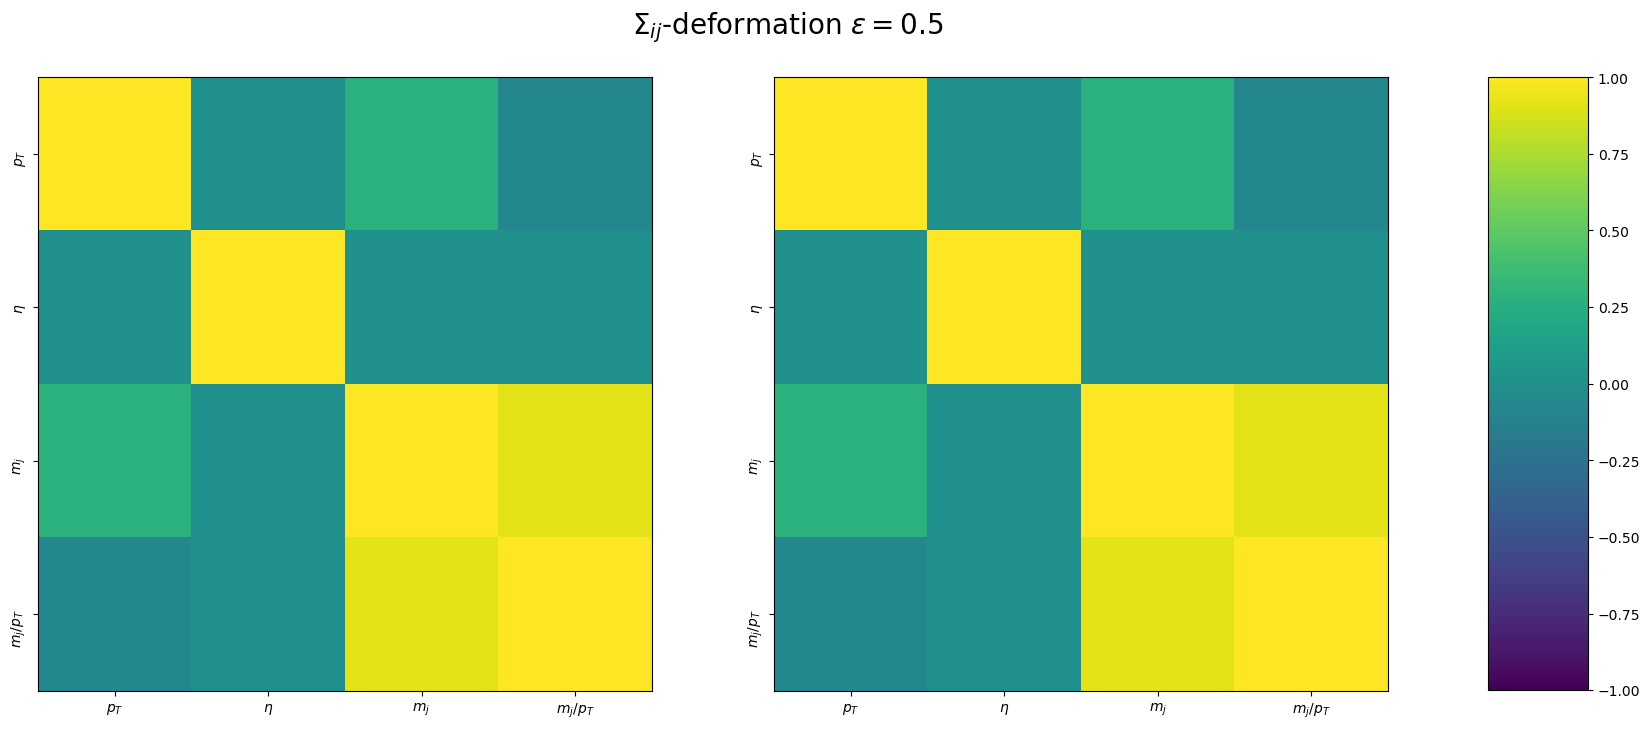

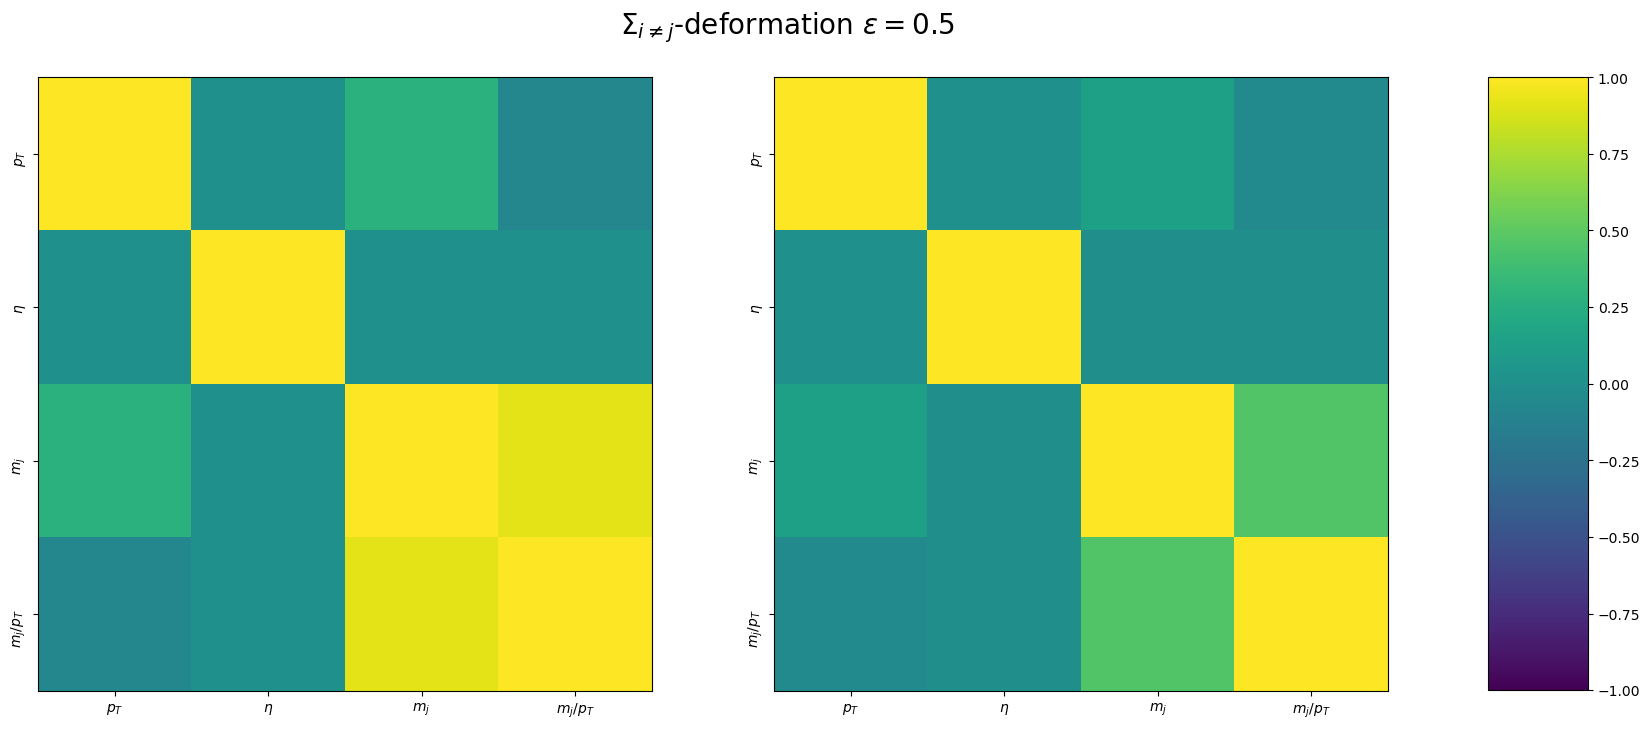

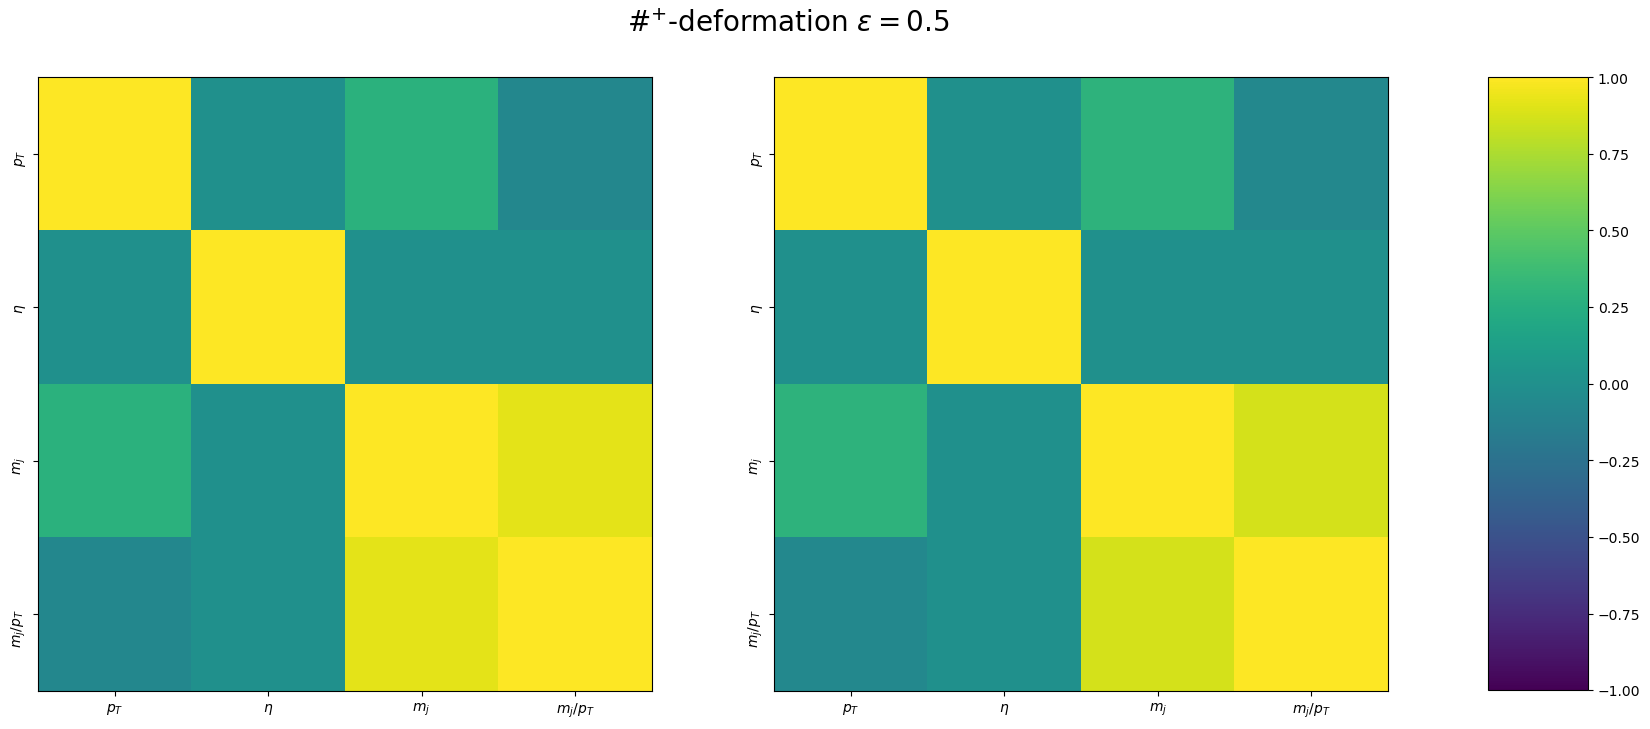

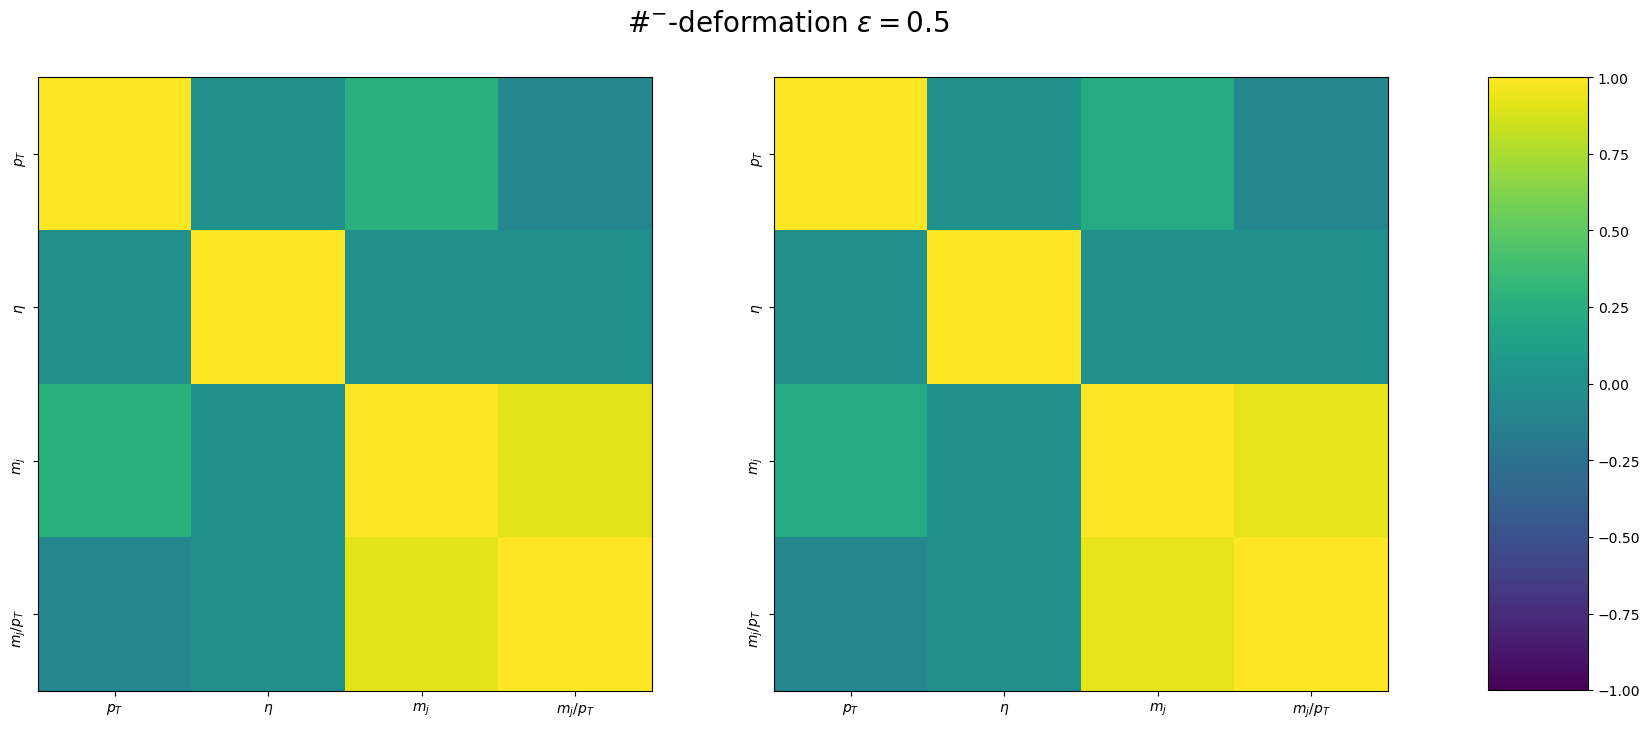

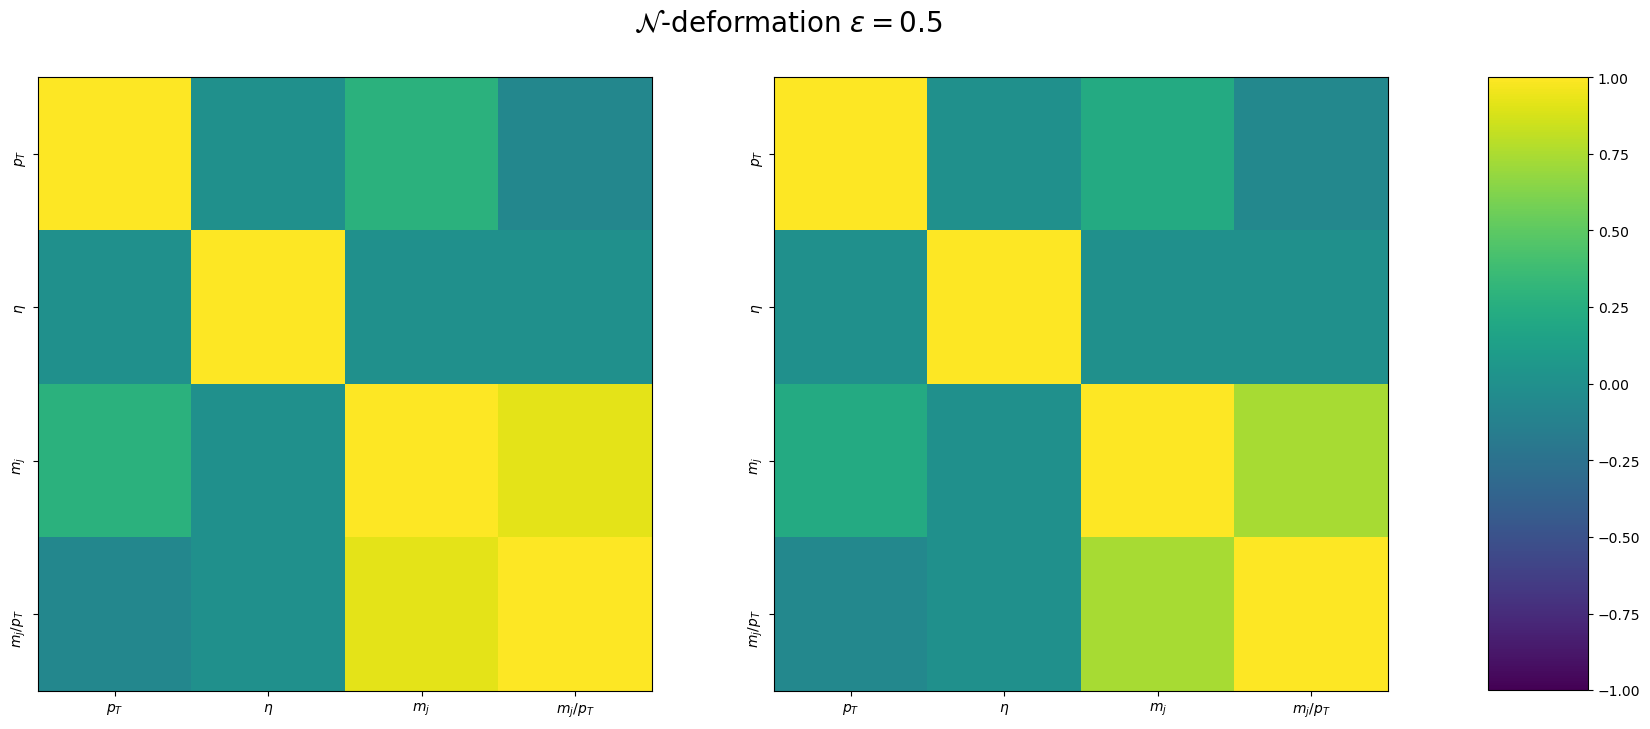

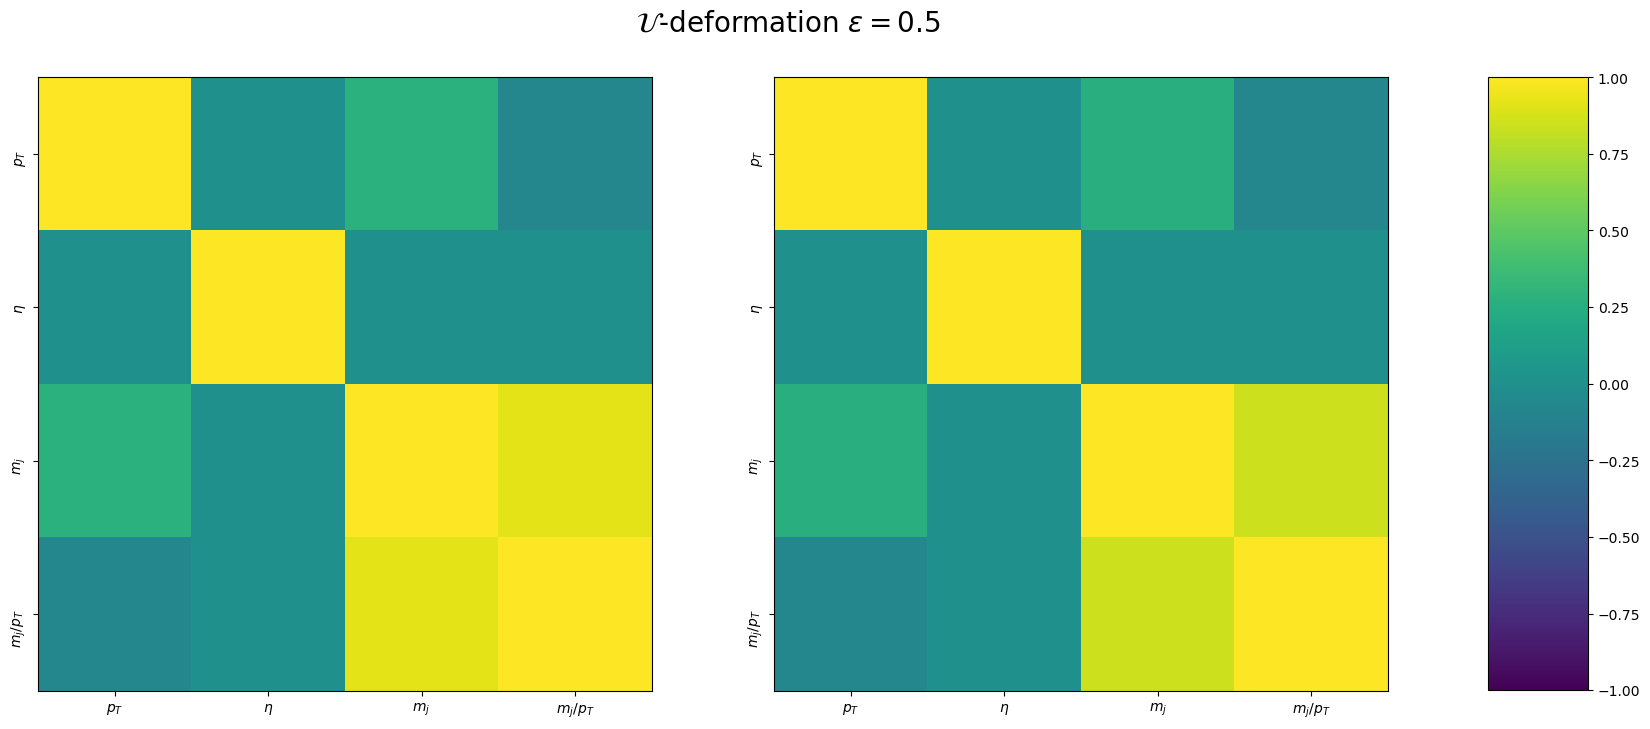

In [13]:
for i in range(len(ds)):
    plot_corr_matrix_side_by_side(dist_1 = jet_features_reduced.numpy(), 
                                  dist_2 = ds[i],
                                  path_to_plots = figures_dir, 
                                  figure_name = "corre_matrix_plot_def_"+str(i+1)+".pdf",
                                  max_points = 1_000_000,
                                  title = plot_titles[i],
                                  labels = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"],
                                  show_labels = True,
                                  show = True,
                                  save = True)